# Business Case : Delhivery [ Feature Engineering ]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math, random
from collections import deque
from scipy.stats import norm
from scipy.stats import binom, poisson, expon, geom
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm, ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import chi2, chi2_contingency, chisquare
from scipy.stats import f_oneway as anova_1way

from scipy.stats import kruskal # numeric Vs catogerical
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric
from scipy.stats import kstest # cdf
from scipy.stats import levene
from scipy.stats import norm
from scipy.stats import shapiro

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples
from scipy.stats import skew, shapiro #[Test for normality]

In [3]:
Data = pd.read_csv("D:\Python programmes\Data Collection\Delhivery_data.csv")

In [4]:
df = Data.copy(deep=True)

In [5]:
df.shape

(144867, 24)

In [6]:
df.head(2)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111


# Problem Statements:-
- <font size = "+1">The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it </font>

# Steps used
- (A) duplicates and null values
- (B) Column Profiling
- (C) Extracting Features (like year,month, etc.)
- (D) Grouping Data
- (E) Features creation
- (F) analysis of outliers% in different columns
- (G) Hpothesis Testings
    - <strong>summary of all hypothesis testings</strong>
- (H) Observations from correlation result and hypothesis testing result combined
- (I) analysis using plots
- (J) Column Standardization
- (K) Summary
    - <strong>summary of all observations</strong>
    - <strong>recommendations</strong>

# (A) duplicates and null values

In [7]:
df.shape

(144867, 24)

## checking any duplicate rows

In [8]:
df.duplicated().sum()

0

## checking missing values

In [9]:
#percentage data missing
for col in df.columns:
    p = df[col].isnull().sum()/len(df[col])*100
    print(col, ": ",round(p,3),"%")

data :  0.0 %
trip_creation_time :  0.0 %
route_schedule_uuid :  0.0 %
route_type :  0.0 %
trip_uuid :  0.0 %
source_center :  0.0 %
source_name :  0.202 %
destination_center :  0.0 %
destination_name :  0.18 %
od_start_time :  0.0 %
od_end_time :  0.0 %
start_scan_to_end_scan :  0.0 %
is_cutoff :  0.0 %
cutoff_factor :  0.0 %
cutoff_timestamp :  0.0 %
actual_distance_to_destination :  0.0 %
actual_time :  0.0 %
osrm_time :  0.0 %
osrm_distance :  0.0 %
factor :  0.0 %
segment_actual_time :  0.0 %
segment_osrm_time :  0.0 %
segment_osrm_distance :  0.0 %
segment_factor :  0.0 %


### dropping values w.r.t null source_name

<mark>dropping null values, since % is quite less</mark>

In [10]:
len(df[df["source_name"].isnull()]["trip_uuid"])

293

In [11]:
bucket1 = df[df["source_name"].isnull()]["trip_uuid"].unique(); bucket1[:10]

array(['trip-153786558437756691', 'trip-153842737815495661',
       'trip-153834519721733970', 'trip-153846056503320607',
       'trip-153852612674280168', 'trip-153785822252799564',
       'trip-153835867702133730', 'trip-153843937115921268',
       'trip-153851526862672465', 'trip-153783153973255752'], dtype=object)

In [12]:
~df["trip_uuid"].isin(bucket1)

0         True
1         True
2         True
3         True
4         True
          ... 
144862    True
144863    True
144864    True
144865    True
144866    True
Name: trip_uuid, Length: 144867, dtype: bool

In [13]:
df = df[~df["trip_uuid"].isin(bucket1)] #drppping values w.r.t null source_name

### dropping values w.r.t null destination_name

In [14]:
len(df[df["destination_name"].isnull()]["trip_uuid"])

113

In [15]:
bucket2 = df[df["destination_name"].isnull()]["trip_uuid"].unique(); bucket2[:10]

array(['trip-153777348608709328', 'trip-153814162355684121',
       'trip-153818374470352843', 'trip-153809562727071982',
       'trip-153843581310735103', 'trip-153807815853537852',
       'trip-153781800694579835', 'trip-153816699243973025',
       'trip-153839170985986650', 'trip-153790940055513598'], dtype=object)

In [16]:
~df["trip_uuid"].isin(bucket2)

0         True
1         True
2         True
3         True
4         True
          ... 
144862    True
144863    True
144864    True
144865    True
144866    True
Name: trip_uuid, Length: 144058, dtype: bool

In [17]:
df = df[~df["trip_uuid"].isin(bucket2)] #drppping values w.r.t null destination_name

In [18]:
#checking percentage data missing after dropping null values
for col in df.columns:
    p = df[col].isnull().sum()/len(df[col])*100
    print(col, ": ",round(p,3),"%")

data :  0.0 %
trip_creation_time :  0.0 %
route_schedule_uuid :  0.0 %
route_type :  0.0 %
trip_uuid :  0.0 %
source_center :  0.0 %
source_name :  0.0 %
destination_center :  0.0 %
destination_name :  0.0 %
od_start_time :  0.0 %
od_end_time :  0.0 %
start_scan_to_end_scan :  0.0 %
is_cutoff :  0.0 %
cutoff_factor :  0.0 %
cutoff_timestamp :  0.0 %
actual_distance_to_destination :  0.0 %
actual_time :  0.0 %
osrm_time :  0.0 %
osrm_distance :  0.0 %
factor :  0.0 %
segment_actual_time :  0.0 %
segment_osrm_time :  0.0 %
segment_osrm_distance :  0.0 %
segment_factor :  0.0 %


In [19]:
df.shape

(143713, 24)

In [20]:
(Data.shape[0]-df.shape[0])/Data.shape[0]*100

0.7965927367861556

In [21]:
# 0.79% of row deleted

<mark>after dropping null values, we still have 143713 rows</mark>

# (B) Column Profiling

Column Profiling:

- <strike>data - tells whether the data is testing or training data</strike>
- <mark>trip_creation_time – Timestamp of trip creation</mark>
- route_schedule_uuid – <mark>Unique Id for a particular route schedule</mark>
- route_type – Transportation type
  - <strong>FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way</strong>
  - Carting: Handling system consisting of small vehicles (carts)
- <mark>trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)</mark>
- <mark>source_center - Source ID of trip origin</mark>
- source_name - Source Name of trip origin
- <mark>destination_cente – Destination ID</mark>
- destination_name – Destination Name
- <mark>od_start_time – Trip start time</mark>
- <mark>od_end_time – Trip end time</mark>
- start_scan_to_end_scan – <mark>Time taken to deliver from source to destination</mark>
- <strike>is_cutoff – Unknown field</strike>
- <strike>cutoff_factor – Unknown field</strike>
- <strike>cutoff_timestamp – Unknown field</strike>
- actual_distance_to_destination – <mark>Distance in Kms between source and destination warehouse</mark>(Cumulative)
- actual_time – <mark>Actual time taken to complete the delivery (Cumulative)</mark>
- <mark>osrm_time</mark> – `An open-source routing engine time calculator` which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
- <mark>osrm_distance</mark> – `An open-source routing engine which computes the shortest path` between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
- <strike>factor – Unknown field</strike>
- segment_actual_time – <mark>This is a segment time. Time taken by the subset of the package delivery</mark>
- <mark>segment_osrm_time</mark> – This is the OSRM segment time. Time taken by the subset of the package delivery
- <mark>segment_osrm_distance</mark> – This is the OSRM distance. Distance covered by subset of the package delivery
- <strike>segment_factor – Unknown field</strike>

In [22]:
df.drop(columns=["data","is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], inplace=True)

In [23]:
df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143713 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   trip_creation_time              143713 non-null  object 
 1   route_schedule_uuid             143713 non-null  object 
 2   route_type                      143713 non-null  object 
 3   trip_uuid                       143713 non-null  object 
 4   source_center                   143713 non-null  object 
 5   source_name                     143713 non-null  object 
 6   destination_center              143713 non-null  object 
 7   destination_name                143713 non-null  object 
 8   od_start_time                   143713 non-null  object 
 9   od_end_time                     143713 non-null  object 
 10  start_scan_to_end_scan          143713 non-null  float64
 11  actual_distance_to_destination  143713 non-null  float64
 12  actual_time     

In [25]:
df["trip_creation_time"] = df["trip_creation_time"].astype("datetime64")

In [26]:
df["od_start_time"] = df["od_start_time"].astype("datetime64")

In [27]:
df["od_end_time"] = df["od_end_time"].astype("datetime64")

In [28]:
df["source_name"] = df["source_name"].astype("str") #was not able to extract city name without converting to str

In [29]:
df["destination_name"] = df["destination_name"].astype("str") #was not able to extract city name without converting to str

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143713 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              143713 non-null  datetime64[ns]
 1   route_schedule_uuid             143713 non-null  object        
 2   route_type                      143713 non-null  object        
 3   trip_uuid                       143713 non-null  object        
 4   source_center                   143713 non-null  object        
 5   source_name                     143713 non-null  object        
 6   destination_center              143713 non-null  object        
 7   destination_name                143713 non-null  object        
 8   od_start_time                   143713 non-null  datetime64[ns]
 9   od_end_time                     143713 non-null  datetime64[ns]
 10  start_scan_to_end_scan          143713 non-null  float64

# (C) Extracting Features

### Extracting year, month and day_name

In [31]:
df["year"] = df["trip_creation_time"].dt.year

In [32]:
df["month"] = df["trip_creation_time"].dt.month_name()

In [33]:
df["day_name"] = df["trip_creation_time"].dt.day_name()

In [34]:
df["time24H"] = df["trip_creation_time"].dt.hour

In [35]:
df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,year,month,day_name,time24H
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,14.0,11.0,11.9653,2018,September,Thursday,2
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,24.0,20.0,21.7243,10.0,9.0,9.7590,2018,September,Thursday,2
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,40.0,28.0,32.5395,16.0,7.0,10.8152,2018,September,Thursday,2
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,62.0,40.0,45.5620,21.0,12.0,13.0224,2018,September,Thursday,2
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,68.0,44.0,54.2181,6.0,5.0,3.9153,2018,September,Thursday,2


### Extracting city and state

In [36]:
df["source_city"] = df["source_name"].apply(lambda x: x.split(" ")[0].split("_")[0])

In [37]:
df["source_state"] = df["source_name"].apply(lambda x: x.split(" ")[-1][1:-1])

In [38]:
df["source_city_code"] = df["source_name"].apply(lambda x: x.split(" ")[0].split("_")[-1])

In [39]:
df["destination_city"] = df["destination_name"].apply(lambda x: x.split("_")[0])

In [40]:
df["destination_state"] = df["destination_name"].apply(lambda x: x.split(" ")[-1][1:-1])

In [41]:
df["destination_city_code"] = df["destination_name"].apply(lambda x: x.split(" ")[0].split("_")[-1])

In [42]:
df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,year,month,day_name,time24H,source_city,source_state,source_city_code,destination_city,destination_state,destination_city_code
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018,September,Thursday,2,Anand,Gujarat,DC,Khambhat,Gujarat,D
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018,September,Thursday,2,Anand,Gujarat,DC,Khambhat,Gujarat,D
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018,September,Thursday,2,Anand,Gujarat,DC,Khambhat,Gujarat,D
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018,September,Thursday,2,Anand,Gujarat,DC,Khambhat,Gujarat,D
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,2018,September,Thursday,2,Anand,Gujarat,DC,Khambhat,Gujarat,D


# (D) Grouping data
## (D.1) Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [43]:
df.shape

(143713, 28)

## observations on 1st trip_uuid

In [44]:
df["trip_uuid"].values[0]

'trip-153741093647649320'

In [45]:
df[df["trip_uuid"]==df["trip_uuid"].values[0]].shape

(10, 28)

In [46]:
Data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [47]:
Data[Data["trip_uuid"]==Data["trip_uuid"].values[0]][["trip_uuid","od_start_time","od_end_time",
                                                           "start_scan_to_end_scan","actual_time","osrm_time",
                                                           "segment_actual_time","segment_osrm_time",
                                                           "actual_distance_to_destination","osrm_distance",
                                                           "segment_osrm_distance"]]

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
0,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,14.0,11.0,14.0,11.0,10.435660,11.9653,11.9653
1,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,24.0,20.0,10.0,9.0,18.936842,21.7243,9.7590
2,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,40.0,28.0,16.0,7.0,27.637279,32.5395,10.8152
3,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,62.0,40.0,21.0,12.0,36.118028,45.5620,13.0224
4,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,68.0,44.0,6.0,5.0,39.386040,54.2181,3.9153
5,trip-153741093647649320,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,15.0,11.0,15.0,11.0,10.403038,12.1171,12.1171
6,trip-153741093647649320,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,44.0,17.0,28.0,6.0,18.045481,21.2890,9.1719
7,trip-153741093647649320,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,65.0,29.0,21.0,11.0,28.061896,35.8252,14.5362
8,trip-153741093647649320,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,76.0,39.0,10.0,10.0,38.939167,47.1900,11.3648
9,trip-153741093647649320,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,102.0,45.0,26.0,6.0,43.595802,53.2334,6.0434


In [48]:
AM = Data[Data["trip_uuid"]==Data["trip_uuid"].values[0]][["trip_uuid","od_start_time","od_end_time",
                                                           "start_scan_to_end_scan","actual_time","osrm_time",
                                                           "segment_actual_time","segment_osrm_time",
                                                           "actual_distance_to_destination","osrm_distance",
                                                           "segment_osrm_distance"]]

In [49]:
arr = ["od_end_time","start_scan_to_end_scan","actual_time","osrm_time","segment_actual_time",
       "segment_osrm_time","actual_distance_to_destination","osrm_distance","segment_osrm_distance"]

In [50]:
agg_fn = {"od_end_time":"last","start_scan_to_end_scan":"last","actual_time":"max","osrm_time":"max","segment_actual_time":"sum",
       "segment_osrm_time":"sum","actual_distance_to_destination":"max","osrm_distance":"max","segment_osrm_distance":"sum"}

In [51]:
AM.groupby(["trip_uuid","od_start_time"])[arr].aggregate(agg_fn)

od_end_time  \
trip_uuid               od_start_time                                            
trip-153741093647649320 2018-09-20 03:21:32.418600  2018-09-20 04:47:45.236797   
                        2018-09-20 04:47:45.236797  2018-09-20 06:36:55.627764   

                                                    start_scan_to_end_scan  \
trip_uuid               od_start_time                                        
trip-153741093647649320 2018-09-20 03:21:32.418600                    86.0   
                        2018-09-20 04:47:45.236797                   109.0   

                                                    actual_time  osrm_time  \
trip_uuid               od_start_time                                        
trip-153741093647649320 2018-09-20 03:21:32.418600         68.0       44.0   
                        2018-09-20 04:47:45.236797        102.0       45.0   

                                                    segment_actual_time  \
trip_uuid               od_start_time                                     
trip-153741093647649320 2018-09-20 03:21:32.418600                 67.0   
                        2018-09-20 04:47:45.236797                100.0   

                                                    segment_osrm_time  \
trip_uuid               od_start_time                                   
trip-153741093647649320 2018-09-20 03:21:32.418600               44.0   
                        2018-09-20 04:47:45.236797               44.0   

                                                    actual_distance_to_destination  \
trip_uuid               od_start_time                                                
trip-153741093647649320 2018-09-20 03:21:32.418600                       39.386040   
                        2018-09-20 04:47:45.236797                       43.595802   

                                                    osrm_distance  \
trip_uuid               od_start_time                               
trip-153741093647649320 2018-09-20 03:21:32.418600        54.2181   
                        2018-09-20 04:47:45.236797        53.2334   

                                                    segment_osrm_distance  
trip_uuid               od_start_time                                      
trip-153741093647649320 2018-09-20 03:21:32.418600                49.4772  
                        2018-09-20 04:47:45.236797                53.2334

## (D.2) groupby trip_uuid

In [52]:
col_list = ["od_end_time","source_center","destination_center","trip_creation_time","route_schedule_uuid","route_type",
            "od_end_time","start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time",
            "osrm_distance","segment_actual_time","segment_osrm_time","segment_osrm_distance",
            "year","month","day_name","time24H","source_city","source_state","source_city_code",
            "destination_city","destination_state","destination_city_code"]
agg_func = {"od_end_time":"last","source_center":"first","destination_center":"last","trip_creation_time":"first",
            "route_schedule_uuid":"first","route_type":"first","start_scan_to_end_scan":"first",
            "actual_distance_to_destination":"max","actual_time":"max","osrm_time":"max","osrm_distance":"max",
            "segment_actual_time":"sum","segment_osrm_time":"sum","segment_osrm_distance":"sum",
            "year":"first","month":"first","day_name":"first","time24H":"first","source_city":"first",
            "source_state":"first","source_city_code":"first","destination_city":"first",
            "destination_state":"first","destination_city_code":"first"}
R = df.groupby(["trip_uuid","od_start_time"])[col_list].aggregate(agg_func)
R.reset_index(inplace=True)

In [53]:
R[R["trip_uuid"]=="trip-153741093647649320"][["trip_uuid","od_start_time","od_end_time",
                                                           "start_scan_to_end_scan","actual_time","osrm_time",
                                                           "segment_actual_time","segment_osrm_time",
                                                           "actual_distance_to_destination","osrm_distance",
                                                           "segment_osrm_distance"]]

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
10366,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,68.0,44.0,67.0,44.0,39.386040,54.2181,49.4772
10367,trip-153741093647649320,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,102.0,45.0,100.0,44.0,43.595802,53.2334,53.2334


In [54]:
R.shape

(26038, 26)

In [55]:
col_list3 = ["od_start_time","od_end_time","source_center","destination_center","trip_creation_time","route_schedule_uuid",
             "route_type","od_end_time","start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time",
            "osrm_distance","segment_actual_time","segment_osrm_time","segment_osrm_distance",
            "year","month","day_name","time24H","source_city","source_state","source_city_code",
            "destination_city","destination_state","destination_city_code"]
agg_func3 = {"od_start_time":"first","od_end_time":"last","source_center":"first","destination_center":"first",
             "trip_creation_time":"first","route_schedule_uuid":"first","route_type":"first","start_scan_to_end_scan":"sum",
            "actual_distance_to_destination":"sum","actual_time":"sum","osrm_time":"sum","osrm_distance":"sum",
            "segment_actual_time":"sum","segment_osrm_time":"sum","segment_osrm_distance":"sum",
            "year":"first","month":"first","day_name":"first","time24H":"first","source_city":"first",
            "source_state":"first","source_city_code":"first","destination_city":"last",
            "destination_state":"last","destination_city_code":"last"}
S = R.groupby(["trip_uuid"])[col_list3].aggregate(agg_func3)
S.reset_index(inplace=True)

In [56]:
S.shape

(14707, 26)

In [57]:
S[S["trip_uuid"]=="trip-153741093647649320"][["trip_uuid","od_start_time","od_end_time",
                                                           "start_scan_to_end_scan","actual_time","osrm_time",
                                                           "segment_actual_time","segment_osrm_time",
                                                           "actual_distance_to_destination","osrm_distance",
                                                           "segment_osrm_distance"]]

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,actual_time,osrm_time,segment_actual_time,segment_osrm_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance
5916,trip-153741093647649320,2018-09-20 03:21:32.418600,2018-09-20 06:36:55.627764,195.0,170.0,89.0,167.0,88.0,82.981842,107.4515,102.7106


In [58]:
# R data frame is groupby trip_uuid and source_center and intermediate destination_center
# S is the final data frame after group by

In [59]:
S.shape

(14707, 26)

In [60]:
S.columns

Index(['trip_uuid', 'od_start_time', 'od_end_time', 'source_center',
       'destination_center', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'year', 'month', 'day_name', 'time24H',
       'source_city', 'source_state', 'source_city_code', 'destination_city',
       'destination_state', 'destination_city_code'],
      dtype='object')

### <mark>final data frame</mark>

In [61]:
df_final = S.copy(deep=True)

# (E) Features creation (time taken between od_start_time and od_end_time)

In [62]:
df_final.columns

Index(['trip_uuid', 'od_start_time', 'od_end_time', 'source_center',
       'destination_center', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'year', 'month', 'day_name', 'time24H',
       'source_city', 'source_state', 'source_city_code', 'destination_city',
       'destination_state', 'destination_city_code'],
      dtype='object')

In [63]:
df_final["delivery_time"]=(df_final["od_end_time"]-df_final["od_start_time"]).dt.total_seconds()/60

In [64]:
df_final.loc[:,("trip_uuid","od_start_time","od_end_time","start_scan_to_end_scan","delivery_time")].head()

,trip_uuid,od_start_time,od_end_time,start_scan_to_end_scan,delivery_time
0,trip-153671041653548748,2018-09-12 00:00:16.535741,2018-09-13 13:40:23.123744,2259.0,2260.109800
1,trip-153671042288605164,2018-09-12 00:00:22.886430,2018-09-12 03:01:59.598855,180.0,181.611874
2,trip-153671043369099517,2018-09-12 00:00:33.691250,2018-09-14 17:34:55.442454,3933.0,3934.362520
3,trip-153671046011330457,2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,100.494935
4,trip-153671052974046625,2018-09-12 00:02:09.740725,2018-09-12 12:00:30.683231,717.0,718.349042


### Transport type Carting and FTL

In [65]:
S[["route_type","actual_distance_to_destination"]].groupby("route_type").describe()

actual_distance_to_destination                                     \
                                    count        mean         std        min   
route_type                                                                     
Carting                            8904.0   40.435914   39.582148   9.002461   
FTL                                5803.0  354.611859  419.315965  15.038338   

                                                             
                   25%         50%         75%          max  
route_type                                                   
Carting      17.727633   27.925413   42.849083   420.013921  
FTL         104.937174  192.689085  373.454058  2187.483994

In [66]:
Carting = df_final[df_final["route_type"]=="Carting"]

In [67]:
FTL = df_final[df_final["route_type"]=="FTL"]

### <mark>creating a function to remove outliers from a given array (using IQR method)</mark>

In [68]:
def remove_outliers(arr):
    IQR = np.quantile(arr, 0.75)-np.quantile(arr, 0.25)
    LL = np.quantile(arr, 0.25)-1.5*IQR
    UL = np.quantile(arr, 0.75)+1.5*IQR
    arr = arr[arr>LL]
    arr = arr[arr<UL]
    return (arr)

# (F) analysis of outliers% in different columns

In [69]:
df_final.columns

Index(['trip_uuid', 'od_start_time', 'od_end_time', 'source_center',
       'destination_center', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'year', 'month', 'day_name', 'time24H',
       'source_city', 'source_state', 'source_city_code', 'destination_city',
       'destination_state', 'destination_city_code', 'delivery_time'],
      dtype='object')

In [70]:
colmn = ("start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time","osrm_distance",
         "segment_actual_time","segment_osrm_time","segment_osrm_distance")

### outliers% in df_final

start_scan_to_end_scan :   8.72 %
actual_distance_to_destination :   9.83 %
actual_time :   11.19 %
osrm_time :   10.27 %
osrm_distance :   10.36 %
segment_actual_time :   11.18 %
segment_osrm_time :   10.14 %
segment_osrm_distance :   10.53 %


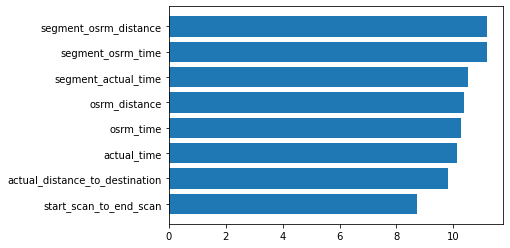

In [71]:
ans = []
for col in colmn:
    arr = df_final[col].values
    percnt = (len(arr)-len(remove_outliers(arr)))/len(arr)*100
    ans.append(percnt)
    print(col,":  ",round(percnt,2),"%")
ans.sort()
plt.barh(colmn,ans)
plt.show()

### outliers% in Carting type transport

start_scan_to_end_scan :   7.05 %
actual_distance_to_destination :   10.58 %
actual_time :   8.51 %
osrm_time :   7.91 %
osrm_distance :   11.67 %
segment_actual_time :   8.36 %
segment_osrm_time :   10.04 %
segment_osrm_distance :   11.29 %


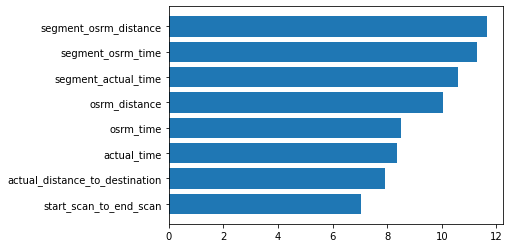

In [72]:
ans = []
for col in colmn:
    arr = Carting[col].values
    percnt = (len(arr)-len(remove_outliers(arr)))/len(arr)*100
    ans.append(percnt)
    print(col,":  ",round(percnt,2),"%")
ans.sort()
plt.barh(colmn,ans)
plt.show()

### outliers% in FTL type transport

start_scan_to_end_scan :   7.01 %
actual_distance_to_destination :   13.46 %
actual_time :   9.75 %
osrm_time :   11.82 %
osrm_distance :   12.03 %
segment_actual_time :   9.72 %
segment_osrm_time :   12.01 %
segment_osrm_distance :   12.8 %


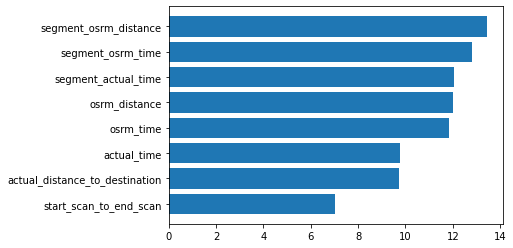

In [73]:
ans = []
for col in colmn:
    arr = FTL[col].values
    percnt = (len(arr)-len(remove_outliers(arr)))/len(arr)*100
    ans.append(percnt)
    print(col,":  ",round(percnt,2),"%")
ans.sort()
plt.barh(colmn,ans)
plt.show()

# (G) Hypothesis testings

## (G.1) Hypothesis Testing: time taken between od_start_time and od_end_time VS start_scan_to_end_scan

### `Hypothesis testing on Carting and FTL data separately`

### `Transport type: Carting`

In [74]:
#Group1: delivery_time(i.e, time taken between od_start_time and od_end_time)
#Group2: start_scan_to_end_scan

In [75]:
pair = ("delivery_time","start_scan_to_end_scan")
data_df = Carting
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1) #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2) #Removing outliers before hypothesis testing 
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
delivery_time,8242.0,201.286364,116.719051,23.461468,112.914778,172.797236,263.119809,579.546572
start_scan_to_end_scan,8242.0,197.929507,113.687003,23.000000,112.000000,171.000000,258.000000,558.000000


#### checking normality of two samples

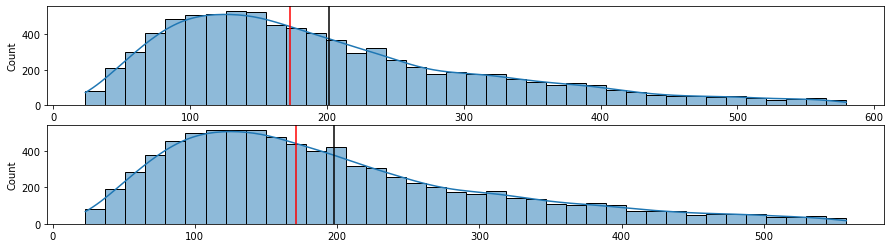

Pic1= delivery_time & Pic2= start_scan_to_end_scan


In [76]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [77]:
(skew(g1),skew(g2))

(0.9890137445418357, 0.9734278196831797)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

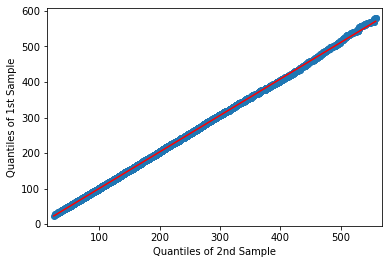

In [78]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have similar distribution</mark>

In [79]:
#Group1: delivery_time(i.e, time taken between od_start_time and od_end_time)
#Group2: start_scan_to_end_scan

In [80]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1, g2) 

LeveneResult(statistic=3.682294136161643, pvalue=0.05501034903227519)

<strong>clearly, pvalue=0.055 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar variance</strong>

<strong>`Since, data is skewed and two groups have similar variance then we will use Kruskal test`</strong>

In [81]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1, g2)

KruskalResult(statistic=2.040384483191234, pvalue=0.15317092671749646)

<strong>clearly, pvalue=0.153 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar median time</strong>

<strong>`In Carting type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>similar median time</mark></strong>

### `Transport type: FTL`

In [82]:
pair = ("delivery_time","start_scan_to_end_scan")
data_df = FTL
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
delivery_time,5396.0,833.921939,575.647035,30.803297,374.838973,703.297848,1165.029108,2628.360934
start_scan_to_end_scan,5396.0,791.157524,549.657444,30.000000,357.000000,660.000000,1112.250000,2528.000000


#### checking normality of two samples

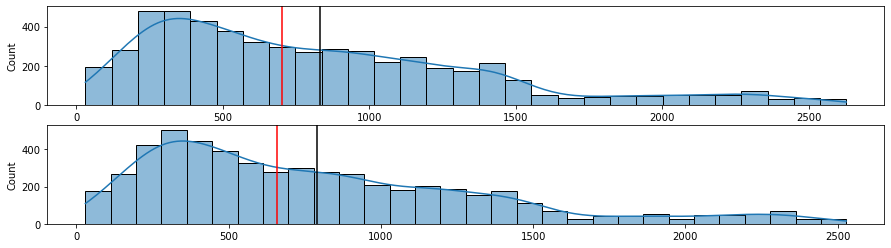

Pic1= delivery_time & Pic2= start_scan_to_end_scan


In [83]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [84]:
(skew(g1),skew(g2))

(0.9924977834651248, 1.037890352734303)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

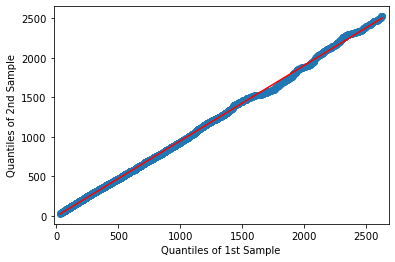

In [85]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have similar distribution</mark>

In [86]:
#Group1: delivery_time(i.e, time taken between od_start_time and od_end_time)
#Group2: start_scan_to_end_scan

In [87]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1, g2) 

LeveneResult(statistic=10.22491813044154, pvalue=0.001389546907479197)

<strong>clearly, pvalue=0.001 < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>`Since, two groups have significant different variance then we will use Kruskal test`</strong>

In [88]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1, g2)

KruskalResult(statistic=12.579798865891883, pvalue=0.00038993869450284753)

<strong>clearly, pvalue=0.0003 < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different median time</strong>

<strong>`In FTL type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>significant different median time</mark></strong>

`Result of Hypothesis testing: `<br>
<strong>`In Carting type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>similar median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>significant different median time</mark></strong>

### (G.2) Hypothesis Testing: actual_time aggregated value VS OSRM time aggregated value

### `Hypothesis testing on Carting and FTL data separately`

### `Transport type: Carting`

In [89]:
#Group1: actual_time aggregated value
#Group2: OSRM time aggregated value

In [90]:
pair = ("actual_time","osrm_time")
data_df = Carting
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1) #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2) #Removing outliers before hypothesis testing 
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,8146.0,93.129389,60.823467,9.0,49.0,75.0,120.0,288.0
osrm_time,8146.0,37.833783,22.342671,6.0,21.0,32.0,51.0,109.0


#### checking normality of two samples

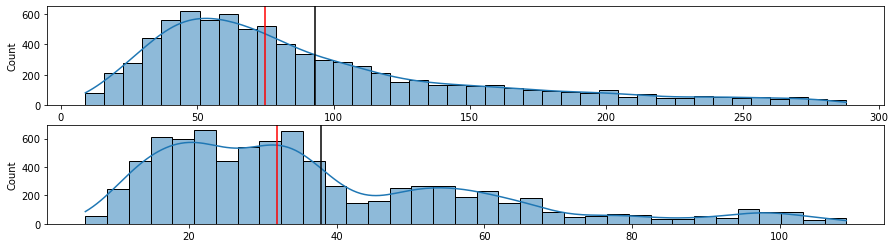

Pic1= actual_time & Pic2= osrm_time


In [91]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [92]:
(skew(g1),skew(g2))

(1.2078908659633556, 1.149318814639331)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

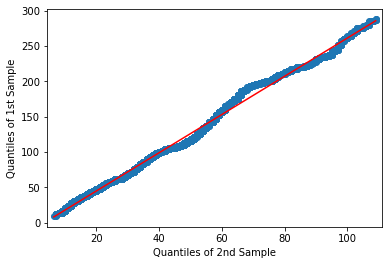

In [93]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have little different distribution</mark>

In [94]:
#Group1: actual_time aggregated value
#Group2: OSRM time aggregated value

In [95]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1, g2)

LeveneResult(statistic=2881.1230041817994, pvalue=0.0)

<strong>clearly, pvalue=0 < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [96]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1, g2)

KruskalResult(statistic=5505.99262304289, pvalue=0.0)

<strong>clearly, pvalue=0 < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median time</strong>

In [97]:
print("median actual_time: ",np.quantile(g1,0.5))
print("median osrm_time: ",np.quantile(g2,0.5))

median actual_time:  75.0
median osrm_time:  32.0


<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong>

<mark><strong>Hence in Carting type transport, osrm app is showing much less time compared to actual time</strong></mark>

### `Transport type: FTL`

In [98]:
#Group1: actual_time aggregated value
#Group2: OSRM time aggregated value

In [99]:
pair = ("actual_time","osrm_time")
data_df = FTL
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,5117.0,505.597225,387.853424,20.0,217.0,376.0,704.0,1842.0
osrm_time,5117.0,218.631816,156.448055,12.0,103.0,177.0,287.0,783.0


#### checking normality of two samples

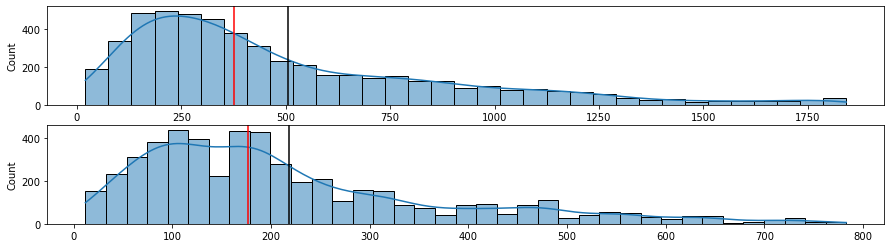

Pic1= actual_time & Pic2= osrm_time


In [100]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [101]:
(skew(g1),skew(g2))

(1.267952408094966, 1.2495031621920867)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

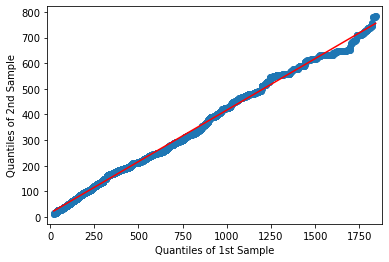

In [102]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have little different distribution</mark>

In [103]:
#Group1: actual_time aggregated value
#Group2: OSRM time aggregated value

In [104]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1, g2)

LeveneResult(statistic=1583.0789047524408, pvalue=2.8e-322)

<strong>clearly, pvalue=$2.8\times 10^{-322}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [105]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1, g2)

KruskalResult(statistic=2134.2285378276415, pvalue=0.0)

<strong>clearly, pvalue=0 < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median time</strong>

In [106]:
print("median actual_time: ",np.quantile(g1,0.5))
print("median osrm_time: ",np.quantile(g2,0.5))

median actual_time:  376.0
median osrm_time:  177.0


<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong>

`Result of Hypothesis testing: `<br>
<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong>

### (G.3) Hypothesis Testing: actual_distance_to_destination VS osrm_distance

### `Hypothesis testing on Carting and FTL data separately`

### `Transport type: Carting`

In [107]:
#Group1: actual_distance_to_destination
#Group2: osrm_distance

In [108]:
pair = ("actual_distance_to_destination","osrm_distance")
data_df = Carting
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
actual_distance_to_destination,7865.0,29.014280,16.049721,9.002461,16.863352,24.86319,37.080548,79.966684
osrm_distance,7865.0,37.408376,20.508703,9.072900,22.353800,33.07030,45.810700,106.164800


#### checking normality of two samples

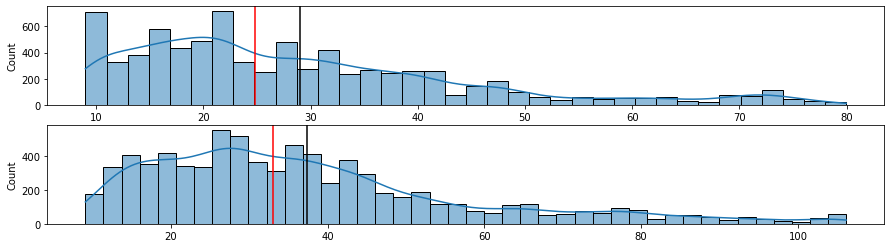

Pic1= actual_distance_to_destination & Pic2= osrm_distance


In [109]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [110]:
(skew(g1),skew(g2))

(1.11461698102942, 1.1589597751486602)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

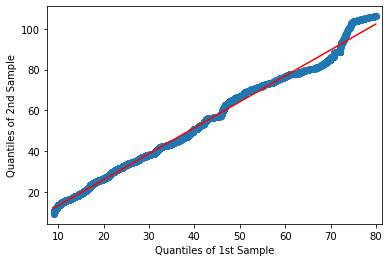

In [111]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have little different distribution</mark>

In [112]:
#Group1: actual_distance_to_destination
#Group2: osrm_distance

In [113]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1, g2)

LeveneResult(statistic=229.61788495908797, pvalue=1.6598621838742473e-51)

<strong>clearly, pvalue=$1.6\times 10^{-51}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [114]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1, g2)

KruskalResult(statistic=785.7075528508977, pvalue=6.910847438118892e-173)

<strong>clearly, pvalue=$6.9\times10^{-173}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median distance</strong>

<strong>`In Carting type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong>

### `Transport type: FTL`

In [115]:
pair = ("actual_distance_to_destination","osrm_distance")
data_df = FTL
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
actual_distance_to_destination,5022.0,206.731821,150.788590,15.038338,100.705737,171.664613,258.603378,769.345397
osrm_distance,5022.0,272.211642,205.990672,17.111500,128.749100,218.560650,342.225675,1037.304500


#### checking normality of two samples

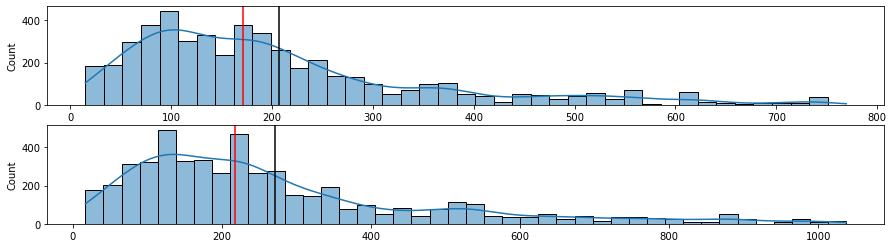

Pic1= actual_distance_to_destination & Pic2= osrm_distance


In [116]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [117]:
(skew(g1),skew(g2))

(1.3805439769232573, 1.4504043341740094)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

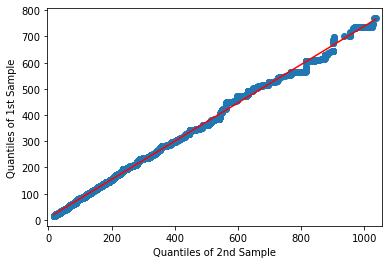

In [118]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have little different distribution</mark>

In [119]:
#Group1: actual_distance_to_destination
#Group2: osrm_distance

In [120]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1, g2)

LeveneResult(statistic=194.22554543805816, pvalue=9.628868978229375e-44)

<strong>clearly, pvalue=$9.6\times 10^{-44}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [121]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1, g2)

KruskalResult(statistic=278.6061434165863, pvalue=1.5112777783486511e-62)

<strong>clearly, pvalue=$1.5\times10^{-62}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median distance</strong>

<strong>`In FTL type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong>

`Result of Hypothesis testing: `<br>
<strong>`In Carting type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong>

### (G.4) Hypothesis Testing: actual_time aggregated value VS segment actual time aggregated value

### `Hypothesis testing on Carting and FTL data separately`

### `Transport type: Carting`

In [122]:
#Group1: actual_time aggregated value
#Group2: segment actual time aggregated value

In [123]:
pair = ("actual_time","segment_actual_time")
data_df = Carting
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1) #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2) #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,8146.0,93.129389,60.823467,9.0,49.0,75.0,120.0,288.0
segment_actual_time,8146.0,92.339185,60.549590,9.0,48.0,74.0,119.0,287.0


#### checking normality of two samples

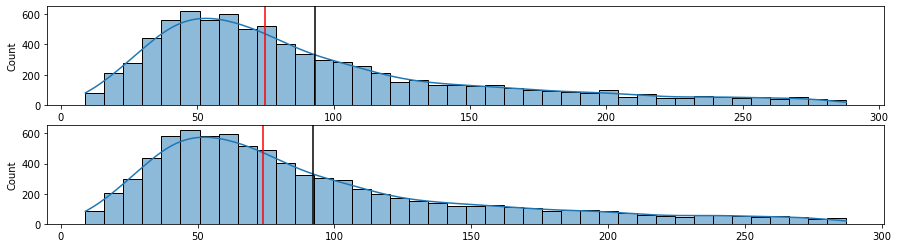

Pic1= actual_time & Pic2= segment_actual_time


In [124]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [125]:
(skew(g1),skew(g2))

(1.2078908659633556, 1.2170030418725926)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

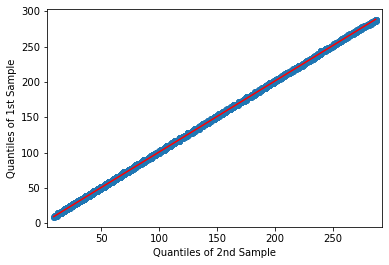

In [126]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have similar distribution</mark>

In [127]:
#Group1: actual_time aggregated value
#Group2: segment actual time aggregated value

In [128]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1,g2)

LeveneResult(statistic=0.12009505342053416, pvalue=0.7289358915113264)

<strong>clearly, pvalue=0.0.72 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar variance</strong>

<strong>Since, two groups have similar variance but skewed data then we will use Kruskal test</strong>

In [129]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1,g2)

KruskalResult(statistic=1.0962933166946358, pvalue=0.2950810078153143)

<strong>clearly, pvalue=0.29 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar median time</strong>

<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong>

### `Transport type: FTL`

In [130]:
#Group1: actual_time aggregated value
#Group2: segment actual time aggregated value

In [131]:
pair = ("actual_time","segment_actual_time")
data_df = FTL
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1) #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2) #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,5237.0,506.103112,388.749636,20.0,217.0,376.0,704.0,1842.0
segment_actual_time,5237.0,502.768761,386.115910,20.0,216.0,374.0,700.0,1825.0


#### checking normality of two samples

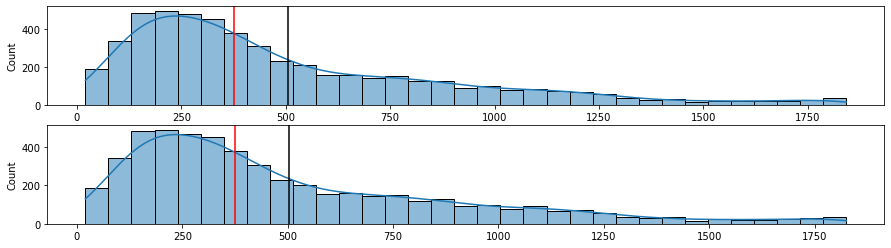

Pic1= actual_time & Pic2= segment_actual_time


In [132]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [133]:
(skew(g1),skew(g2))

(1.267952408094966, 1.2648537284611387)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

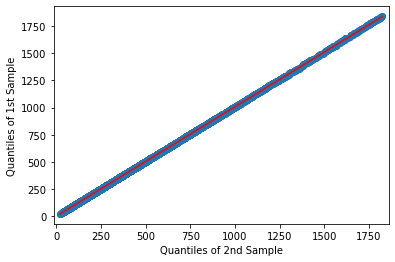

In [134]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have similar distribution</mark>

In [135]:
#Group1: actual_time aggregated value
#Group2: segment actual time aggregated value

In [136]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1,g2)

LeveneResult(statistic=0.1117878845021975, pvalue=0.7381244584651849)

<strong>clearly, pvalue=0.73 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar variance</strong>

<strong>Since, two groups have similar variance but skewed data then we will use Kruskal test</strong>

In [137]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1,g2)

KruskalResult(statistic=0.1938117453737686, pvalue=0.6597628905641479)

<strong>clearly, pvalue=0.659 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar median time</strong>

<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong>

`Result of Hypothesis testing: `<br>
<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong>

### (G.5) Hypothesis Testing: osrm distance aggregated value & segment osrm distance aggregated value

### `Hypothesis testing on Carting and FTL data separately`

### `Transport type: Carting`

In [138]:
#Group1: osrm distance aggregated value
#Group2: segment osrm distance aggregated value

In [139]:
pair = ("osrm_distance","segment_osrm_distance")
data_df = Carting
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,7865.0,37.408376,20.508703,9.0729,22.3538,33.0703,45.8107,106.1648
segment_osrm_distance,7865.0,40.628705,23.445987,9.0729,23.5739,35.1846,52.2265,122.6234


#### checking normality of two samples

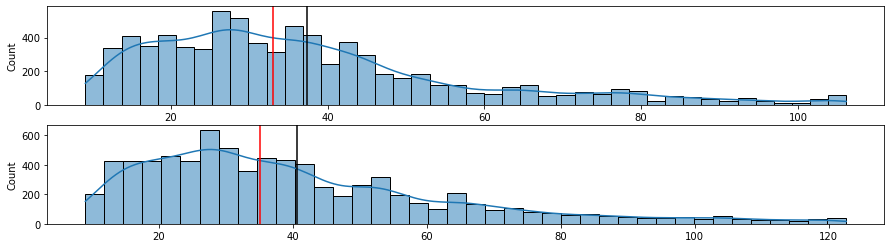

Pic1= osrm_distance & Pic2= segment_osrm_distance


In [140]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [141]:
(skew(g1),skew(g2))

(1.1589597751486602, 1.2002806208462027)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

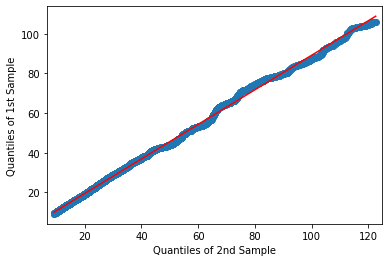

In [142]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have approximately similar distribution</mark>

In [143]:
#Group1: osrm distance aggregated value
#Group2: segment osrm distance aggregated value

In [144]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1,g2)

LeveneResult(statistic=84.14618531450817, pvalue=5.152819986069509e-20)

<strong>clearly, pvalue=$5.12\times10^{-20}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [145]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1,g2)

KruskalResult(statistic=52.56415071475147, pvalue=4.1642147731015945e-13)

<strong>clearly, pvalue=$4.16\times10^{-13}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median distance</strong>

<strong>`In Carting type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>different median distance</mark></strong>

### `Transport type: FTL`

In [146]:
#Group1: osrm distance aggregated value
#Group2: segment osrm distance aggregated value

In [147]:
pair = ("osrm_distance","segment_osrm_distance")
data_df = FTL
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,5060.0,272.609911,206.230294,17.1115,128.843250,219.10815,343.170000,1037.3045
segment_osrm_distance,5060.0,280.342997,213.049416,17.1115,131.040525,223.25705,349.946325,1096.7543


#### checking normality of two samples

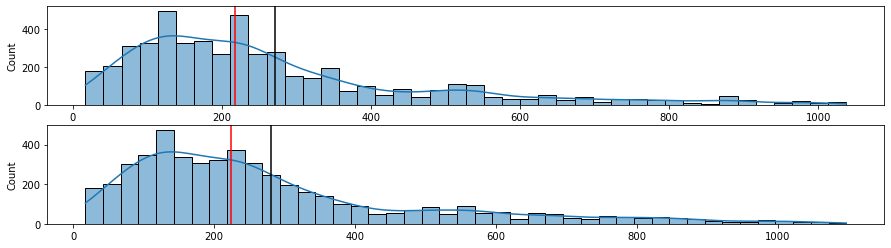

Pic1= osrm_distance & Pic2= segment_osrm_distance


In [148]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [149]:
(skew(g1),skew(g2))

(1.4504043341740094, 1.4222943846269434)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

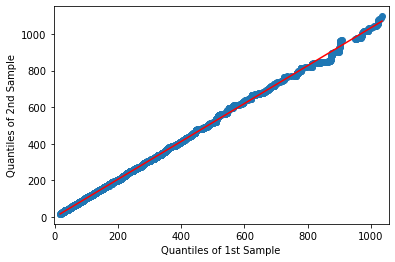

In [150]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have approximately similar distribution</mark>

In [151]:
#Group1: osrm distance aggregated value
#Group2: segment osrm distance aggregated value

In [152]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1,g2)

LeveneResult(statistic=3.1886614164754152, pvalue=0.07418051440810781)

<strong>clearly, pvalue=0.074 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar variance</strong>

<strong>Since, two groups have skewed data but similar variance then we will use Kruskal test</strong>

In [153]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1,g2)

KruskalResult(statistic=3.3167713008586954, pvalue=0.06857638285824542)

<strong>clearly, pvalue=0.0685 > 0.05 </strong><br>
    <strong>H0 is not rejected, hence two groups have similar median distance</strong>

<strong>`In FTL type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>similar median distance</mark></strong>

`Result of Hypothesis testing: `<br>
<strong>`In Carting type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>similar median distance</mark></strong>

### (G.6) Hypothesis Testing:  osrm time aggregated value & segment osrm time aggregated

### `Hypothesis testing on Carting and FTL data separately`

### `Transport type: Carting`

In [154]:
#Group1: osrm time aggregated value
#Group2: segment osrm time aggregated

In [155]:
pair = ("osrm_time","segment_osrm_time")
data_df = Carting
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,8010.0,37.886642,22.402428,6.0,21.0,32.0,51.0,109.0
segment_osrm_time,8010.0,39.226717,23.265373,6.0,21.0,33.0,53.0,121.0


#### checking normality of two samples

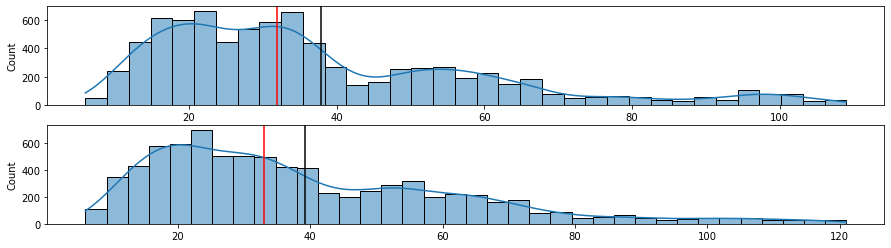

Pic1= osrm_time & Pic2= segment_osrm_time


In [156]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [157]:
(skew(g1),skew(g2))

(1.149318814639331, 1.0989505074017085)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

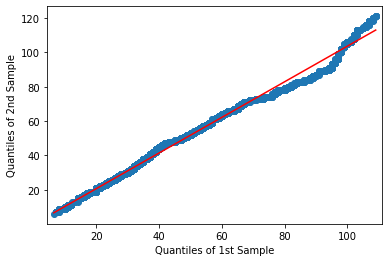

In [158]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have slightly different distribution</mark>

In [159]:
#Group1: osrm time aggregated value
#Group2: segment osrm time aggregated

In [160]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1,g2)

LeveneResult(statistic=18.359460794604882, pvalue=1.8396333837897906e-05)

<strong>clearly, pvalue=$1.8\times 10^{-5}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [161]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1,g2)

KruskalResult(statistic=12.376940120027035, pvalue=0.00043466890533989006)

<strong>clearly, pvalue=0.0004 < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median time</strong>

<strong>`In Carting type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong>

### `Transport type: FTL`

In [162]:
#Group1: osrm time aggregated value
#Group2: segment osrm time aggregated

In [163]:
pair = ("osrm_time","segment_osrm_time")
data_df = FTL
g1 = data_df[pair[0]].values; g1 = remove_outliers(g1)  #Removing outliers before hypothesis testing
g2 = data_df[pair[1]].values; g2 = remove_outliers(g2)  #Removing outliers before hypothesis testing
minn = min(g1.shape[0],g2.shape[0])
pd.DataFrame({pair[0]:g1[:minn],pair[1]:g2[:minn]}).describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,5106.0,218.627889,156.42412,12.0,103.0,177.0,287.00,783.0
segment_osrm_time,5106.0,236.884646,176.57558,12.0,113.0,187.0,310.75,891.0


#### checking normality of two samples

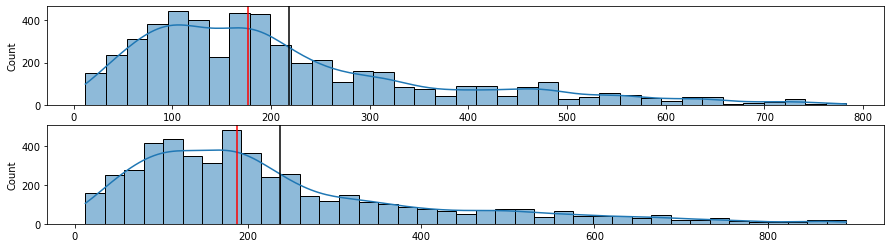

Pic1= osrm_time & Pic2= segment_osrm_time


In [164]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
sns.histplot(x=g1,kde=True)
plt.axvline(np.mean(g1), c="k"); plt.axvline(np.quantile(g1,0.5), c="r")

plt.subplot(2,1,2)
sns.histplot(x=g2,kde=True)
plt.axvline(np.mean(g2), c="k"); plt.axvline(np.quantile(g2,0.5), c="r")
plt.show()
print("Pic1=",pair[0],"&","Pic2=",pair[1])

In [165]:
(skew(g1),skew(g2))

(1.2495031621920867, 1.3633664663469427)

<mark>both samples are right skewed</mark>

#### comparing distribution of two samples

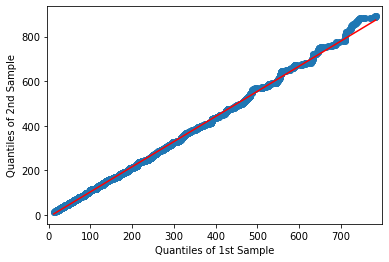

In [166]:
# Quantile-Quantile plot for 2samples
qqplot_2samples(g1, g2, line="r")
plt.show()

<mark>both groups have slightly different distribution</mark>

In [167]:
#Group1: osrm time aggregated value
#Group2: segment osrm time aggregated

In [168]:
# H0: two groups have same variance
# H1: two groups do not have same variance
# alpha = 0.05
levene(g1,g2)

LeveneResult(statistic=23.89333963613309, pvalue=1.0337172956410169e-06)

<strong>clearly, pvalue=$1.03\times 10^{-6}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significant different variance</strong>

<strong>Since, two groups have diff variance then we will use Kruskal test</strong>

In [169]:
# H0: two groups have same median
# H1: two groups have significantly different median
# alpha = 0.05
kruskal(g1,g2)

KruskalResult(statistic=18.49908124732415, pvalue=1.6998622212949166e-05)

<strong>clearly, pvalue=$1.699\times10^{-5}$ < 0.05 </strong><br>
    <strong>H0 is rejected, hence two groups have significantly different median time</strong>

<strong>`In FTL type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong>

`Result of Hypothesis testing: `<br>
<strong>`In Carting type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong>

### (G.5) <mark>Summary of all Hypothesis Testing</mark>

<strong>`In Carting type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>similar median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>significant different median time</mark></strong>

<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong>

<strong>`In Carting type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong>

<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong>

<strong>`In Carting type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>similar median distance</mark></strong>

<strong>`In Carting type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong>

# (H) Observations from correlation result and hypothesis testing result combined

### Heat map

In [170]:
df_carting=Carting.loc[:,("delivery_time","start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time",
                          "osrm_distance","segment_actual_time","segment_osrm_time","segment_osrm_distance")]

In [171]:
df_FTL=FTL.loc[:,("delivery_time","start_scan_to_end_scan","actual_distance_to_destination","actual_time","osrm_time",
                  "osrm_distance","segment_actual_time","segment_osrm_time","segment_osrm_distance")]

In [172]:
df_carting.corr()

,delivery_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
delivery_time,1.000000,0.987201,0.554412,0.779500,0.560826,0.567949,0.778915,0.522191,0.542533
start_scan_to_end_scan,0.987201,1.000000,0.555218,0.782815,0.560665,0.566994,0.782181,0.523607,0.542696
actual_distance_to_destination,0.554412,0.555218,1.000000,0.624328,0.960437,0.976890,0.617513,0.886629,0.924592
actual_time,0.779500,0.782815,0.624328,1.000000,0.621379,0.636806,0.999946,0.590026,0.616873
osrm_time,0.560826,0.560665,0.960437,0.621379,1.000000,0.982921,0.614885,0.941995,0.945007
osrm_distance,0.567949,0.566994,0.976890,0.636806,0.982921,1.000000,0.630321,0.924720,0.956812
segment_actual_time,0.778915,0.782181,0.617513,0.999946,0.614885,0.630321,1.000000,0.583965,0.610724
segment_osrm_time,0.522191,0.523607,0.886629,0.590026,0.941995,0.924720,0.583965,1.000000,0.966254
segment_osrm_distance,0.542533,0.542696,0.924592,0.616873,0.945007,0.956812,0.610724,0.966254,1.000000


In [173]:
df_carting.corr().loc["delivery_time","start_scan_to_end_scan"]

0.987201078629895

Text(0.5, 1.0, 'FTL')

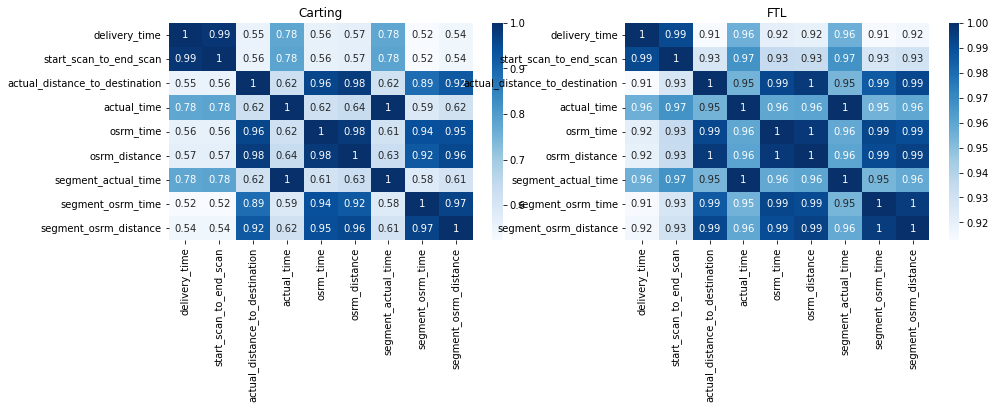

In [174]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.heatmap(df_carting.corr(), annot=True, cmap="Blues")
plt.title("Carting")
plt.subplot(1,2,2)
sns.heatmap(df_FTL.corr(), annot=True, cmap="Blues")
plt.title("FTL")

### (H.1) "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan"

In [175]:
# time difference between od_start_time & od_end_time is "delivery time"

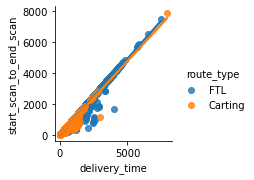

 FTL corr_coef: 0.991717332821526 
 Carting corr_coef: 0.987201078629895


In [176]:
pair = ("delivery_time","start_scan_to_end_scan")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Results from hypothesis testing`<br>
<strong>`In Carting type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>similar median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "time taken between od_start_time and od_end_time" & "start_scan_to_end_scan" have <mark>significant different median time</mark></strong>

<strong>observations</strong><br>
- `In Carting type transport:` start_scan_to_end_scan is giving <strong>approximate correct result</strong> for delivery_time.
- `In FTL type transport:` start_scan_to_end_scan is giving <strong>different result but higly correlated</strong> with delivery_time.

### (H.2) actual_time aggregated value" & "OSRM time aggregated value

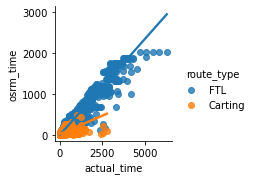

 FTL corr_coef: 0.9595529836080139 
 Carting corr_coef: 0.6213787261533834


In [177]:
pair = ("actual_time","osrm_time")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Results from hypothesis testing`<br>
<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "OSRM time aggregated value" have <mark>significant different median time</mark></strong>

<strong>observations</strong><br>
- `In Carting type transport:` OSRM app is giving <strong>different time</strong> compared to actual time but OSRM time & actual time are <strong>highly correlated.</strong>
- `In FTL type transport:` OSRM app is giving <strong>different time</strong> compared to actual time but OSRM time & actual time are <strong>highly correlated.</strong>

### (H.3) actual_time aggregated value" & "OSRM time aggregated value

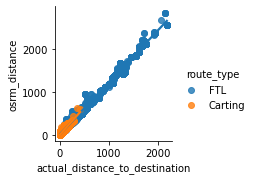

 FTL corr_coef: 0.9966983953238906 
 Carting corr_coef: 0.9768896800060239


In [178]:
pair = ("actual_distance_to_destination","osrm_distance")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Results from hypothesis testing`<br>
<strong>`In Carting type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> actual_distance_to_destination and osrm_distance have <mark>significant different median distance</mark></strong>

<strong>observations</strong><br>
- `In Carting type transport:` OSRM app is giving <strong>different distance</strong> compared to actual distance but OSRM distance & actual distance are <strong>highly correlated.</strong>
- `In FTL type transport:` OSRM app is giving <strong>different distance</strong> compared to actual distance but OSRM distance & actual distance are <strong>highly correlated.</strong>

### (H.4) actual_time aggregated value" & "segment actual time aggregated value

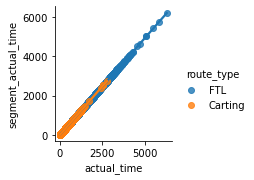

 FTL corr_coef: 0.9999920028380778 
 Carting corr_coef: 0.9999458398815487


In [179]:
pair = ("actual_time","segment_actual_time")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Results from hypothesis testing`<br>
<strong>`In Carting type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "actual_time aggregated value" & "segment actual time aggregated value" have <mark>similar median time</mark></strong>

<strong>observations</strong><br>
- `In Carting type transport:` "actual_time aggregated value" & "segment actual time aggregated value" are <strong>approximately same</strong>
- `In FTL type transport:` "actual_time aggregated value" & "segment actual time aggregated value" are <strong>approximately same</strong>

### (H.5) osrm distance aggregated value" & "segment osrm distance aggregated value

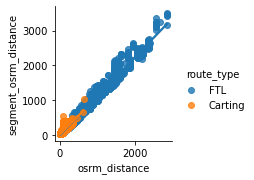

 FTL corr_coef: 0.994169157173174 
 Carting corr_coef: 0.9568116556553649


In [180]:
pair = ("osrm_distance","segment_osrm_distance")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Results from hypothesis testing`<br>
<strong>`In Carting type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "osrm distance aggregated value" & "segment osrm distance aggregated value" have <mark>similar median distance</mark></strong>

<strong>observations</strong><br>
- `In Carting type transport:` "osrm distance aggregated value" & "segment osrm distance aggregated value" are having <strong>different values but higly correlated.</strong>
- `In FTL type transport:` "osrm distance aggregated value" & "segment osrm distance aggregated value" are having <strong>approximately same values</strong>

### (H.6) "osrm time aggregated value" & "segment osrm time aggregated"

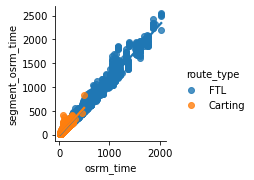

 FTL corr_coef: 0.992646997680048 
 Carting corr_coef: 0.9419953007249934


In [181]:
pair = ("osrm_time","segment_osrm_time")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Results from hypothesis testing`<br>
<strong>`In Carting type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong><br>
<strong>`In FTL type transport:` </strong><strong> "osrm time aggregated value" & "segment osrm time aggregated" have <mark>different median distance</mark></strong>

<strong>observations</strong><br>
- `In Carting type transport:` "osrm time aggregated value" & "segment osrm time aggregated" have <strong>diferent value but highly correlated.</strong>
- `In FTL type transport:` "osrm time aggregated value" & "segment osrm time aggregated" have <strong>diferent value but highly correlated.</strong>

# (I) analysis using plots

### (I.1) Comparison & Visualization of time and distance fields

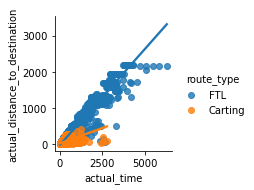

 FTL corr_coef: 0.9543466609173723 
 Carting corr_coef: 0.6243284937148411


In [182]:
pair = ("actual_time","actual_distance_to_destination")
sns.pairplot(data=df_final,kind="reg",hue="route_type",
             x_vars=[pair[0]],
             y_vars=[pair[1]],
)
plt.show()
v1=df_final[df_final["route_type"]=="FTL"].corr().loc[pair[0],pair[1]]
v2=df_final[df_final["route_type"]=="Carting"].corr().loc[pair[0],pair[1]]
print(" FTL corr_coef:",v1,"\n","Carting corr_coef:",v2)

`Observations:` <strong>delivery speed of FTL is faster compared to Carting</strong><br>
<strong>delivery speed of FTL is faster compared to Carting:</strong> Carting delivery speed need to be improved

### (I.2)  State with highest delivery load

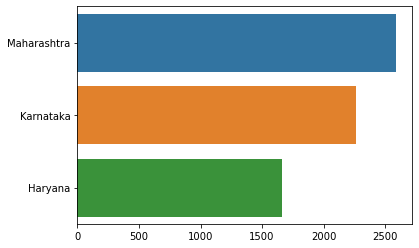

In [183]:
sns.barplot(y=df_final["destination_state"].value_counts()[:3].index,
            x=df_final["destination_state"].value_counts()[:3].values);plt.show()

<mark><strong>Highest delivery load is from Maharashtra State</strong></mark><br>
<strong>Highest delivery load is from Maharashtra State:</strong> In Maharashtra: Warehouses need to be connected with fastest route possible

### (I.3) City with highest delivery load

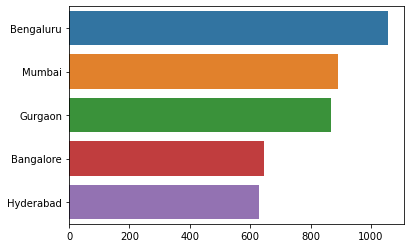

In [184]:
sns.barplot(y=df_final["destination_city"].value_counts()[:5].index,
            x=df_final["destination_city"].value_counts()[:5].values);plt.show()

<mark><strong>Highest delivery load is from Bengaluru City</strong></mark><br>
<strong>Highest delivery load is from Bengaluru City:</strong> Increasing the automated sort centres in Bengaluru will help to manage parcels more efficiently.

### (I.4) day of week with highest delivery load

<AxesSubplot:>

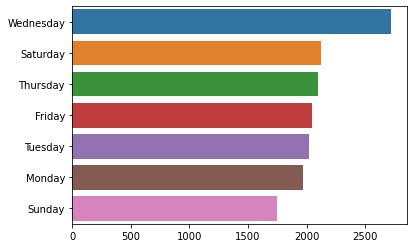

In [185]:
sns.barplot(y=df_final["day_name"].value_counts().index, x=df_final["day_name"].value_counts().values)

<mark><strong>Highest delivery load is on Wednesday</strong></mark><br>
<strong>Highest delivery load is on Wednesday:</strong> All delivery trips should be in night or early morning to avoid day traffic.

### (I.5) time with respect to trip creation

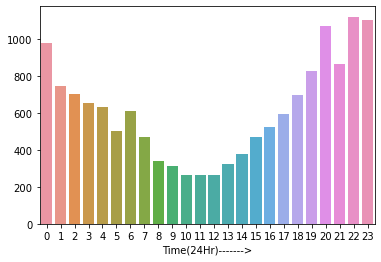

In [186]:
sns.barplot(x=df_final["time24H"].value_counts().index, y=df_final["time24H"].value_counts().values)
plt.xlabel("Time(24Hr)------->");plt.show()

<mark><strong>Most of the trips are created in nights and early morning</strong></mark>

### (I.6) busiest route

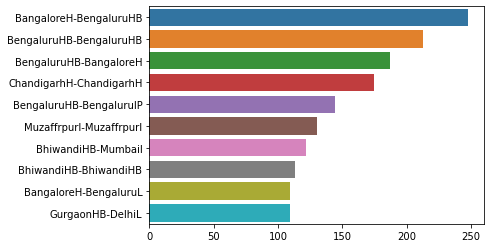

In [199]:
X=(df_final["source_city"]+df_final["source_city_code"]+"-"+df_final["destination_city"]+df_final["destination_city_code"]).value_counts()[:10]
sns.barplot(x=X.values, y=X.index); plt.show()

<mark><strong>Most of deliveries are within the city banglore</strong></mark><br>
<strong>Most of deliveries are within the city banglore:</strong> In Bengaluru: delivery centres need to be connected with fastest route possible. Bengaluru needs highest workforce compared to other cities.

# (J) Column Standardization

Standardization: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.
$\large{X_{\text {new }}=\frac{X_{i}-X_{\text {mean }}}{\text { Standard Deviation }}}$

In [377]:
df_final.columns

Index(['trip_uuid', 'od_start_time', 'od_end_time', 'source_center',
       'destination_center', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'year', 'month', 'day_name', 'time24H',
       'source_city', 'source_state', 'source_city_code', 'destination_city',
       'destination_state', 'destination_city_code', 'delivery_time'],
      dtype='object')

In [378]:
col = "start_scan_to_end_scan"
df_final["start_scan_to_end_standardisation"]=(df_final[col]-df_final[col].mean())/df_final[col].std()

In [379]:
col = "actual_distance_to_destination"
df_final["actual_distance_to_destination_standardisation"]=(df_final[col]-df_final[col].mean())/df_final[col].std()

In [380]:
col = "actual_time"
df_final["actual_time_standardisation"]=(df_final[col]-df_final[col].mean())/df_final[col].std()

In [381]:
col = "osrm_time"
df_final["osrm_time_standardisation"]=(df_final[col]-df_final[col].mean())/df_final[col].std()

In [382]:
col = "osrm_distance"
df_final["osrm_distance_standardisation"]=(df_final[col]-df_final[col].mean())/df_final[col].std()

In [383]:
df_final.loc[:,("start_scan_to_end_standardisation","actual_distance_to_destination_standardisation",
                "actual_time_standardisation","osrm_time_standardisation","osrm_distance_standardisation")].head()

,start_scan_to_end_standardisation,actual_distance_to_destination_standardisation,actual_time_standardisation,osrm_time_standardisation,osrm_distance_standardisation
0,2.621510,2.154924,2.141533,2.128316,2.115070
1,-0.529981,-0.297670,-0.379541,-0.343487,-0.321891
2,5.159073,5.769272,5.312864,5.782922,5.827980
3,-0.651251,-0.480458,-0.528780,-0.537569,-0.497840
4,0.284040,-0.120593,-0.027763,-0.164052,-0.156026


In [384]:
df_final.columns

Index(['trip_uuid', 'od_start_time', 'od_end_time', 'source_center',
       'destination_center', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'year', 'month', 'day_name', 'time24H',
       'source_city', 'source_state', 'source_city_code', 'destination_city',
       'destination_state', 'destination_city_code', 'delivery_time',
       'start_scan_to_end_standardisation',
       'actual_distance_to_destination_standardisation',
       'actual_time_standardisation', 'osrm_time_standardisation',
       'osrm_distance_standardisation'],
      dtype='object')

# (K) Summary

## (K.1) <mark>Summary of all observations</mark>

- `In Carting type transport:` start_scan_to_end_scan is giving <strong>approximate correct result</strong> for delivery_time.
- `In FTL type transport:` start_scan_to_end_scan is giving <strong>different result but higly correlated</strong> with delivery_time.

- `In Carting type transport:` <mark>OSRM app</mark> is giving <strong>different time</strong> compared to actual time but OSRM time & actual time are <strong>highly correlated.</strong>
- `In FTL type transport:` <mark>OSRM app</mark> is giving <strong>different time</strong> compared to actual time but OSRM time & actual time are <strong>highly correlated.</strong>

- `In Carting type transport:` <mark>OSRM app</mark> is giving <strong>different distance</strong> compared to actual distance but OSRM distance & actual distance are <strong>highly correlated.</strong>
- `In FTL type transport:` <mark>OSRM app</mark> is giving <strong>different distance</strong> compared to actual distance but OSRM distance & actual distance are <strong>highly correlated.</strong>

- `In Carting type transport:` "actual_time aggregated value" & "segment actual time aggregated value" are <strong>approximately same</strong>
- `In FTL type transport:` "actual_time aggregated value" & "segment actual time aggregated value" are <strong>approximately same</strong>

- `In Carting type transport:` "osrm distance aggregated value" & "segment osrm distance aggregated value" are having <strong>different values but higly correlated.</strong>
- `In FTL type transport:` "osrm distance aggregated value" & "segment osrm distance aggregated value" are having <strong>approximately same values</strong>

- `In Carting type transport:` "osrm time aggregated value" & "segment osrm time aggregated" have <strong>diferent value but highly correlated.</strong>
- `In FTL type transport:` "osrm time aggregated value" & "segment osrm time aggregated" have <strong>diferent value but highly correlated.</strong>

## (K.2)  observations from plots & recommendations

- <strong>Delivery speed of FTL is faster compared to Carting:</strong> Carting delivery speed need to be improved
- <strong>Highest delivery load is from Maharashtra State:</strong> In Maharashtra: Warehouses need to be connected with fastest route possible
- <strong>Most of deliveries are within the city banglore:</strong> In Bengaluru: delivery centres need to be connected with fastest route possible. Bengaluru needs highest workforce compared to other cities.
- <strong>Highest delivery load is from Bengaluru City:</strong> Increasing the automated sort centres in Bengaluru will help to manage parcels more efficiently.
- <strong>Highest delivery load is on Wednesday:</strong> All delivery trips should be in night or early morning to avoid day traffic.